In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# Verisetinin yüklenmesi
veri = pd.read_csv("/Users/atakanemre/YapayZekaLab/Hafta-2/OrnekUygulama/train.csv")

# Sınıf sayısının belirlenmesi
label_encoder = LabelEncoder().fit(veri.price_range)
labels = label_encoder.transform(veri.price_range)
classes = list(label_encoder.classes_)

In [3]:
# Girdi ve çıktı verilerinin hazırlanması
X = veri.drop(["price_range"], axis=1)
y = labels

# Verilerin standartlaştırılması
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Eğitim ve test verilerinin hazırlanması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Çıktı değerlerinin kategorileştirilmesi
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=20, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.summary()

/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592 (2.31 KB)

 Trainable params: 592 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Modelin derlenmesi
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Modelin eğitilmesi
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2416 - loss: 1.5821 - val_accuracy: 0.2825 - val_loss: 1.4139
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2718 - loss: 1.3811 - val_accuracy: 0.3850 - val_loss: 1.3144
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3865 - loss: 1.2872 - val_accuracy: 0.4525 - val_loss: 1.2152
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5076 - loss: 1.1731 - val_accuracy: 0.5375 - val_loss: 1.0927
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5494 - loss: 1.0499 - val_accuracy: 0.6275 - val_loss: 0.9483
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6004 - loss: 0.9211 - val_accuracy: 0.7075 - val_loss: 0.8200
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6861 - loss: 0.7789 - val_accuracy: 0.7425 - val_loss: 0.7164
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7304 - loss: 0.6887 - val_accuracy: 0.7575 - v

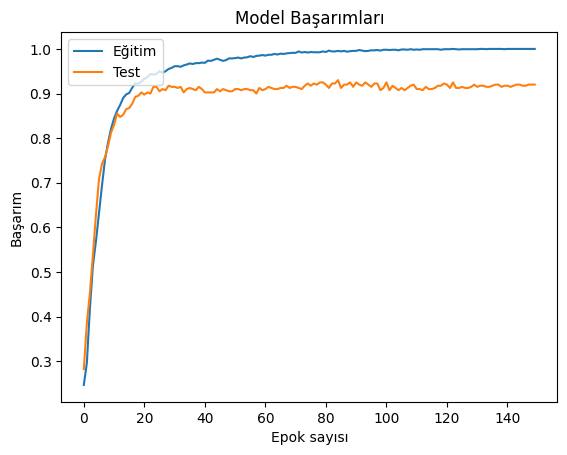

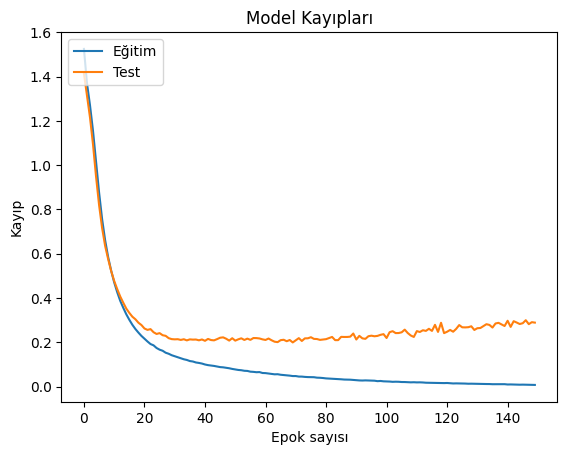

In [7]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Başarımları")
plt.ylabel("Başarım")
plt.xlabel("Epok sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Kayıpları")
plt.ylabel("Kayıp")
plt.xlabel("Epok sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()